# Compare means

The compare means t-test is used to compare the mean of a variable in one group to the mean of the same variable in one, or more, other groups. The null hypothesis for the difference between the groups in the population is set to zero. We test this hypothesis using sample data.

In [1]:
import os
import matplotlib as mpl
import pyrsm as rsm

# increase plot resolution
mpl.rcParams["figure.dpi"] = 150

In [2]:
## setup pyrsm for autoreload when you edit code and save
## nothing else needed!
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [3]:
rsm.load_data(pkg="basics", name="salary", dct=globals())

In [4]:
rsm.describe(salary)

## Salaries for Professors

### Description

The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a college in the U.S. The data were collected as part of the on-going effort of the college's administration to monitor salary differences between male and female faculty members. A data frame with 397 observations on the following 6 variables.

### Variables

- rank = a factor with levels AsstProf, AssocProf, and Prof
- discipline = a factor with levels A ('theoretical' departments) or B ('applied' departments)
- yrs.since.phd = years since PhD
- yrs.service = years of service
- sex = a factor with levels Female and Male
- salary = nine-month salary, in dollars

### Source

Fox J. and Weisberg, S. (2011) An R Companion to Applied Regression, Second Edition Sage.


In [5]:
salary.head()

,salary,rank,discipline,yrs.since.phd,yrs.service,sex
0,139750,Prof,B,19,18,Male
1,173200,Prof,B,20,16,Male
2,79750,AsstProf,B,4,3,Male
3,115000,Prof,B,45,39,Male
4,141500,Prof,B,40,41,Male


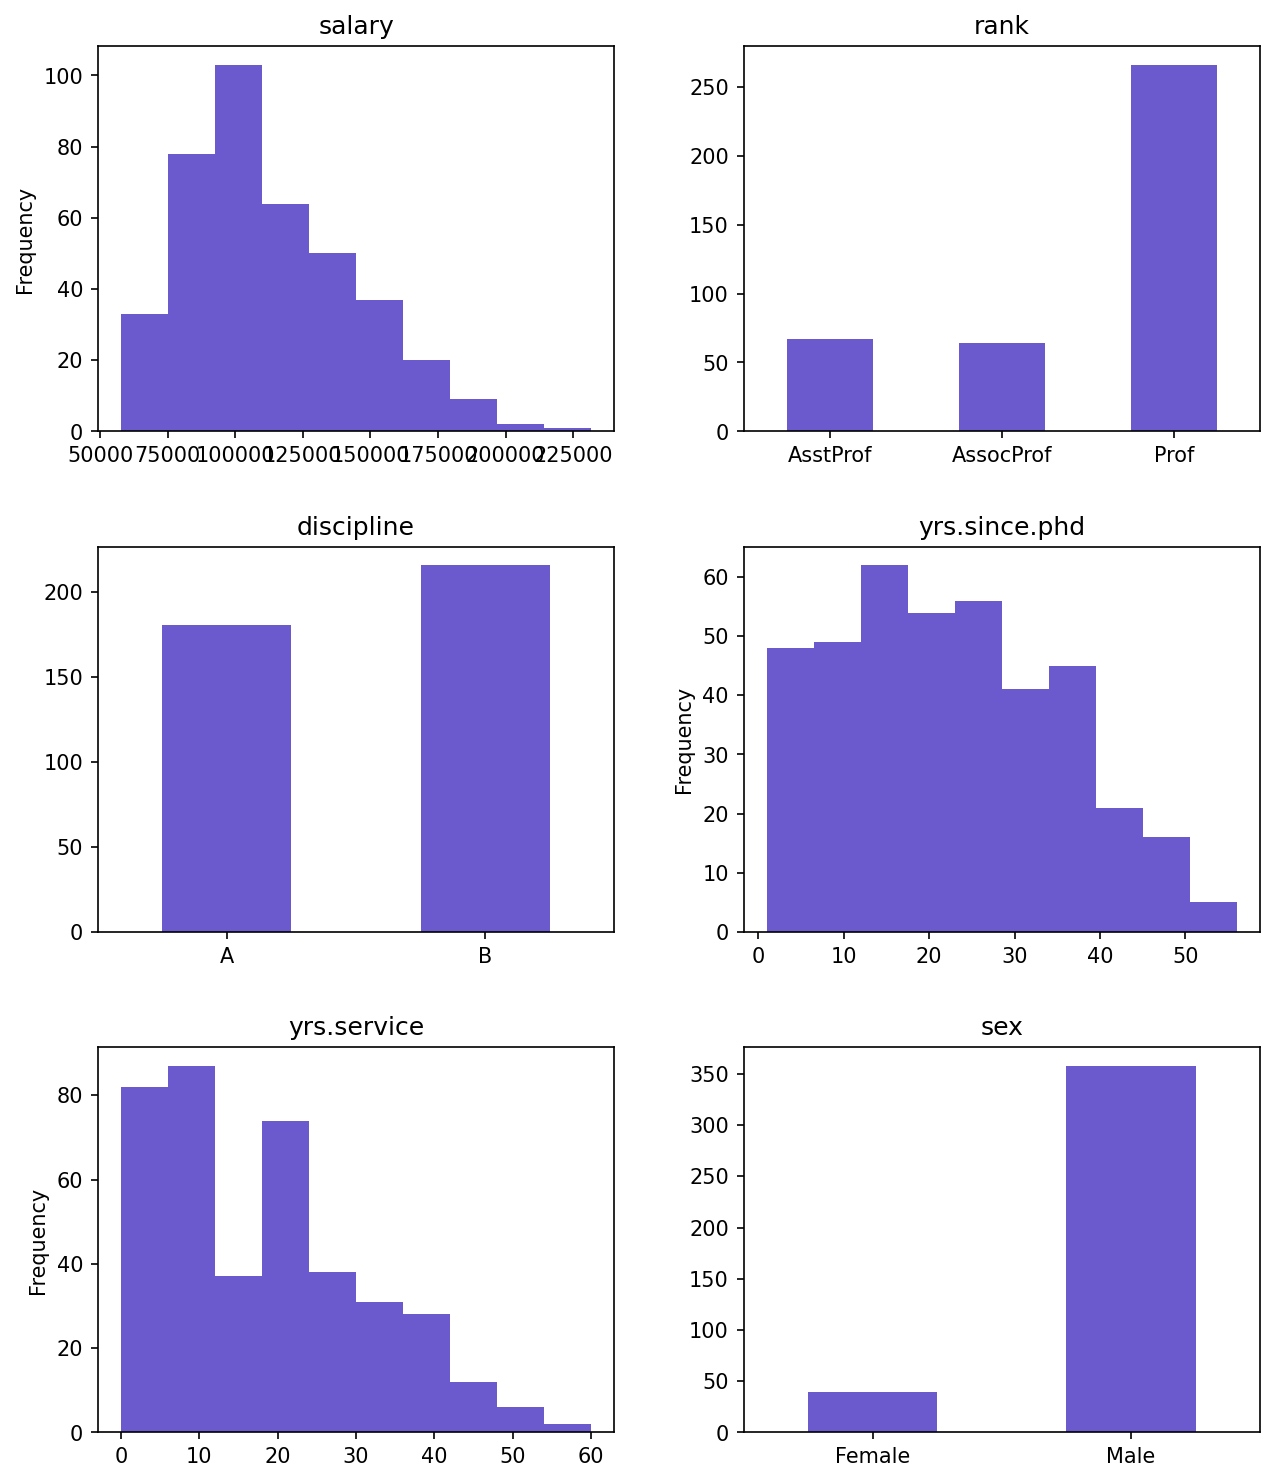

In [10]:
rsm.distr_plot(salary)

In [32]:
# cm = rsm.compare_means(salary, "rank", "salary", [("AsstProf", "AssocProf"), ("AsstProf", "Prof"), ("AssocProf", "Prof")], "two-sided", 0.95)
# cm = rsm.compare_means(salary, "rank", "salary", [("AsstProf", "AssocProf"), ("AsstProf", "Prof"), ("AssocProf", "Prof")], "less", 0.95)
cm = rsm.compare_means(salary, "rank", "salary", [("AsstProf", "AssocProf"), ("AsstProf", "Prof"), ("AssocProf", "Prof")], "greater", 0.95)
cm = rsm.compare_means(salary, "rank", "salary", [("AsstProf", "AssocProf"), ("AsstProf", "Prof"), ("AssocProf", "Prof")], "greater", 0.95, adjust="bonferroni")
cm.summary(dec=3)

Pairwise mean comparisons (t-test)
Data      : Not provided
Variables : rank, salary
Samples   : independent
Confidence: 0.95
Adjustment: bonferroni
     rank       mean   n  n_missing        sd       se       me
 AsstProf  80775.985  67          0  8174.113  998.627 1993.823
     Prof 126772.109 266          0 27718.675 1699.541 3346.322
AssocProf  93876.438  64          0 13831.700 1728.962 3455.056
           Null hyp.            Alt. hyp.       diff  p.value       se  t.value      df       5.0%  100%  
AsstProf = AssocProf AsstProf > AssocProf -13100.452      1.0 1996.639   -6.561 101.286 -16414.947   inf  
     AsstProf = Prof      AsstProf > Prof -45996.124      1.0 1971.217  -23.334 324.340 -49247.774   inf  
    AssocProf = Prof     AssocProf > Prof -32895.672      1.0 2424.407  -13.569 199.325 -36902.087   inf  
